In [1]:
# Importando bibliotercas necessárias para coleta e manipulação dos dados
import pandas as pd
import psycopg2

Coleta e primeiros tratamentos

In [2]:
# Conectando ao banco de dados SQL
conexao_SQL = psycopg2.connect(host="localhost", database="Final", user="postgres", password="123", port=5432)

In [3]:
# Armazena os nomes de cada tabela do banco de dados
colunas = ["CLIENTES", "CREDITO", "EMPREGO", "ESTADOCIVIL", "FIADOR", "HABITACAO", "HISTORICO_CREDITO", "INVESTIMENTOS", "OUTROSFINANC", "PROFISSAO", "PROPOSITO"]

# Criação de listas auxiliares
dados = []
nomes_colunas = []

In [4]:
# Cria um cursor para executar as instruções no banco de dados
cursor = conexao_SQL.cursor()

# Percorre a lista de tabelas e armazena o resultado de SELECT
for i in colunas:
    consulta = f'SELECT * FROM "{i}"'
    cursor.execute(consulta)
    registro = cursor.fetchall()
    dados.append(registro)
    # Aramazena a descrição de cada consulta. Etapa necessária para manter exatamente a estrutura de cada tabela (nomes de cada coluna por exemplo)
    nomes_colunas.append(cursor.description)
    

In [5]:
# Converte os dados de clientes em um dataframe
clientes = pd.DataFrame(dados[0])
# Define os nomes das colunas a partir dos nomes armazenados da consulta SQL
clientes.columns = [nome[0] for nome in nomes_colunas[0]]

In [6]:
clientes

,idcliente,cliente,estado,sexo
0,1,Cliente 1,SP,M
1,2,Cliente 2,RJ,F
2,3,Cliente 3,MG,M
3,4,Cliente 4,BA,F
4,5,Cliente 5,RS,M


In [7]:
# Converte os dados de credito em um dataframe
credito = pd.DataFrame(dados[1])
# Define os nomes das colunas a partir dos nomes armazenados da consulta SQL
credito.columns = [nome[0] for nome in nomes_colunas[1]]
credito

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,505,24,2,4,1207,2,1.0,4,1,3,4.0,24,3,3.0,1,999,1,0,0,0
996,834,24,2,1,5084,1,2.0,2,1,3,4.0,42,3,1.0,1,999,1,1,0,1
997,234,18,0,1,866,2,3.0,4,3,4,2.0,25,3,1.0,1,3,1,0,0,1
998,474,6,0,10,1238,1,5.0,4,4,3,4.0,36,3,1.0,1,1,2,1,0,1


In [8]:
# Converte os dados de emprego em um dataframe
emprego = pd.DataFrame(dados[2])
# Define os nomes das colunas a partir dos nomes armazenados da consulta SQL
emprego.columns = [nome[0] for nome in nomes_colunas[2]]
emprego

,IDEMPREGO,EMPREGO
0,1,<1
1,2,>=7
2,3,1<=X<4
3,4,4<=X<7
4,5,Desempregado


In [9]:
# Trantando o ID de cada dado de emprego
# Temos dados que representam um intervalo (quantidade de empregos que certo cliente pode responder). 
# Uitilização de dicionário para guardar os novos valores
encoding_emprego = {"<1":0, "Desempregado":1, "1<=X<4": 2, "4<=X<7": 3, ">=7": 4}
# Adiciona uma nova coluna a partir do uso de mapeamento 
emprego['encoded'] = emprego['EMPREGO'].map(encoding_emprego)
emprego

,IDEMPREGO,EMPREGO,encoded
0,1,<1,0
1,2,>=7,4
2,3,1<=X<4,2
3,4,4<=X<7,3
4,5,Desempregado,1


In [10]:
# Converte os dados de estadocivil em um dataframe
estadocivil = pd.DataFrame(dados[3])
# Define os nomes das colunas a partir dos nomes armazenados da consulta SQL
estadocivil.columns = [nome[0] for nome in nomes_colunas[3]]
# Armazena como dicionário a relação ID e Estado civil para uso posterior
estadocivil_dic = estadocivil.set_index('IDESTADOCIVIL')['ESTADOCIVIL'].to_dict()
estadocivil

,IDESTADOCIVIL,ESTADOCIVIL
0,1,Solteiro
1,2,Casado
2,3,Divorciado
3,4,Viuvo


In [11]:
# Converte os dados de fiador em um dataframe
fiador = pd.DataFrame(dados[4])  
# Define os nomes das colunas a partir dos nomes armazenados da consulta SQL  
fiador.columns = [nome[0] for nome in nomes_colunas[4]]  
# Armazena como dicionário a relação ID e Fiador para uso posterior  
fiador_dic = fiador.set_index('IDFIADOR')['FIADOR'].to_dict()  
fiador  

,IDFIADOR,FIADOR
0,1,co aplicante
1,2,co requerente
2,3,nao
3,4,sim


In [12]:
# Converte os dados de habitação em um dataframe  
habitacao = pd.DataFrame(dados[5])  
# Define os nomes das colunas a partir dos nomes armazenados da consulta SQL  
habitacao.columns = [nome[0] for nome in nomes_colunas[5]]  
# Armazena como dicionário a relação ID e Habitação para uso posterior  
habitacao_dic = habitacao.set_index('IDHABITACAO')['HABITACAO'].to_dict()  
habitacao  

,IDHABITACAO,HABITACAO
0,1,proria
1,2,de graca
2,3,alugada


In [13]:
# Converte os dados de histórico de crédito em um dataframe  
historico_credito = pd.DataFrame(dados[6])  
# Define os nomes das colunas a partir dos nomes armazenados da consulta SQL  
historico_credito.columns = [nome[0] for nome in nomes_colunas[6]]  
# Armazena como dicionário a relação ID e Histórico de Crédito para uso posterior  
historico_dic = historico_credito.set_index('IDHISTCRED')['HISTORICO'].to_dict()  
historico_credito  

,IDHISTCRED,HISTORICO
0,1,Critico-outros creditos
1,2,existentes/pagos
2,3,Atrasos anteriores
3,4,sem creditos/todos pagos
4,5,todos pagos


In [14]:
# Converte os dados de investimento em um dataframe  
investimento = pd.DataFrame(dados[7])
# Define os nomes das colunas a partir dos nomes armazenados da consulta SQL  
investimento.columns = [nome[0] for nome in nomes_colunas[7]]
investimento

,IDINVESTIMENTOS,INVESTIMENTOS
0,1,Desconhecido\\n
1,2,<100\\n
2,3,500<=X<1000
3,4,>=1000
4,5,100<=X<500


In [15]:
# Usando replace limpa os dados
investimento['INVESTIMENTOS'] = investimento['INVESTIMENTOS'].str.replace(r'\\n', '', regex=True)
investimento['INVESTIMENTOS'] = investimento['INVESTIMENTOS'].str.replace(r'\\', '', regex=True)
investimento

,IDINVESTIMENTOS,INVESTIMENTOS
0,1,Desconhecido
1,2,<100
2,3,500<=X<1000
3,4,>=1000
4,5,100<=X<500


In [16]:
# Trantando o ID de cada dado de investimento
# Temos dados que representam um intervalo (quantidade de investimentos que certo cliente pode responder). 
# Uitilização de dicionário para guardar os novos valores
encoding_investimento = {"Desconhecido":0, "<100":1, "100<=X<500": 2, "500<=X<1000": 3, ">=1000": 4}
# Adiciona uma nova coluna a partir do uso de mapeamento 
investimento['encoded'] = investimento['INVESTIMENTOS'].map(encoding_investimento)
investimento

,IDINVESTIMENTOS,INVESTIMENTOS,encoded
0,1,Desconhecido,0
1,2,<100,1
2,3,500<=X<1000,3
3,4,>=1000,4
4,5,100<=X<500,2


In [17]:
# Converte os dados de outros financiamentos em um dataframe  
outrosfinanciamentos = pd.DataFrame(dados[8])  
# Define os nomes das colunas a partir dos nomes armazenados da consulta SQL  
outrosfinanciamentos.columns = [nome[0] for nome in nomes_colunas[8]]  
# Armazena como dicionário a relação ID e Outros Financiamentos para uso posterior  
outrosfinanciamentos_dic = outrosfinanciamentos.set_index('IDOUTROSFINANC')['OUTROSFINANCIAMENTOS'].to_dict()  
outrosfinanciamentos  

,IDOUTROSFINANC,OUTROSFINANCIAMENTOS
0,1,banco
1,2,loja
2,3,nenhum


In [18]:
# Converte os dados de profissão em um dataframe  
profissao = pd.DataFrame(dados[9])  
# Define os nomes das colunas a partir dos nomes armazenados da consulta SQL  
profissao.columns = [nome[0] for nome in nomes_colunas[9]]  
# Armazena como dicionário a relação ID e Profissão para uso posterior  
profissao_dic = profissao.set_index('IDPROFISSAO')['PROFISSAO'].to_dict()  
profissao  

,IDPROFISSAO,PROFISSAO
0,1,altamente qualificado/empresario
1,2,desempregado
2,3,nao qualificado
3,4,qualificado


In [19]:
# Converte os dados de propósito em um dataframe  
proposito = pd.DataFrame(dados[10])  
# Define os nomes das colunas a partir dos nomes armazenados da consulta SQL  
proposito.columns = [nome[0] for nome in nomes_colunas[10]]  
# Armazena como dicionário a relação ID e Propósito para uso posterior  
proposito_dic = proposito.set_index('IDPROPOSITO')['PROPOSITO'].to_dict()  
proposito  

,IDPROPOSITO,PROPOSITO
0,1,reforma
1,2,educacao
2,3,moveis
3,4,veiculo novo
4,5,veiculo usado
5,6,abrir negocio
6,7,quitar divida
7,8,reforma casa
8,9,outros
9,10,qualificacao


In [20]:
# A tabela cliente apresenta os principais dados para a realização do projeto
# Status é a classe alvo
credito

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,505,24,2,4,1207,2,1.0,4,1,3,4.0,24,3,3.0,1,999,1,0,0,0
996,834,24,2,1,5084,1,2.0,2,1,3,4.0,42,3,1.0,1,999,1,1,0,1
997,234,18,0,1,866,2,3.0,4,3,4,2.0,25,3,1.0,1,3,1,0,0,1
998,474,6,0,10,1238,1,5.0,4,4,3,4.0,36,3,1.0,1,1,2,1,0,1


In [21]:
# Importante conhecer melhor a estrutura dos dados
# Uso de shape para descobrir o número de atributos e instâncias
credito.shape

(1000, 20)

In [22]:
# Verifica a existência de dados nulos
credito.isnull().sum()

IDCREDITO                0
Duracao                  0
HistoricoCredito         0
Proposito                0
Valor                    0
Investimentos            0
Emprego                 10
TempoParcelamento        0
EstadoCivil              0
FiadorTerceiros          0
ResidenciaDesde          7
Idade                    0
OutrosFinanciamentos     0
Habitacao                9
EmprestimoExistente      0
Profissao                0
Dependentes              0
SocioEmpresa             0
Estrangeiro              0
Status                   0
dtype: int64

In [23]:
# Copia a base de dados
credito_copia = credito.copy()
# Preenche os dados nulos com o valor da moda de cada atributo
credito_copia['Emprego'] = credito_copia['Emprego'].fillna(credito_copia['Emprego'].mode()[0])
credito_copia['ResidenciaDesde'] = credito_copia['ResidenciaDesde'].fillna(credito_copia['ResidenciaDesde'].mode()[0])
credito_copia['Habitacao'] = credito_copia['Habitacao'].fillna(credito_copia['Habitacao'].mode()[0])

In [24]:
credito_copia.isnull().sum()

IDCREDITO               0
Duracao                 0
HistoricoCredito        0
Proposito               0
Valor                   0
Investimentos           0
Emprego                 0
TempoParcelamento       0
EstadoCivil             0
FiadorTerceiros         0
ResidenciaDesde         0
Idade                   0
OutrosFinanciamentos    0
Habitacao               0
EmprestimoExistente     0
Profissao               0
Dependentes             0
SocioEmpresa            0
Estrangeiro             0
Status                  0
dtype: int64

In [25]:
# O atributo histórico de créditos apresenta um erro. 
# No dataframe é possível verificar que existem valores de ID 0
credito_copia['HistoricoCredito'].unique()

array([2, 1, 3, 4, 5, 0], dtype=int64)

In [26]:
historico_dic

{1: 'Critico-outros creditos',
 2: 'existentes/pagos',
 3: 'Atrasos anteriores',
 4: 'sem creditos/todos pagos',
 5: 'todos pagos'}

In [27]:
# Subistitui os valores pela moda
credito_copia.loc[credito_copia['HistoricoCredito'] == 0, 'HistoricoCredito'] = credito_copia['HistoricoCredito'].mode()[0]

In [28]:
# Converte os dados para inteiros
credito_copia['Emprego'] = credito_copia['Emprego'].astype(int)

In [29]:
credito_copia['Emprego'].unique()

array([3, 4, 2, 1, 5])

In [30]:
emprego

,IDEMPREGO,EMPREGO,encoded
0,1,<1,0
1,2,>=7,4
2,3,1<=X<4,2
3,4,4<=X<7,3
4,5,Desempregado,1


In [31]:
# Altera os valores de ID para os novos, armazenados anteriormente
encoding_emprego_credito = {1: 0, 2:4, 3: 2, 4:3, 5:1}
credito_copia['Emprego'] = credito_copia['Emprego'].map(encoding_emprego_credito)

In [32]:
encoding_investimento_credito = {1:0, 2:1, 3:3, 4:4, 5:2}
credito_copia['Investimentos'] = credito_copia['Investimentos'].map(encoding_investimento_credito)

Análise exploratória

In [33]:
# Import de bibliotecas para auxiliar na criação de gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import statistics  as sts

Text(0.5, 1.0, 'Valores crédito')

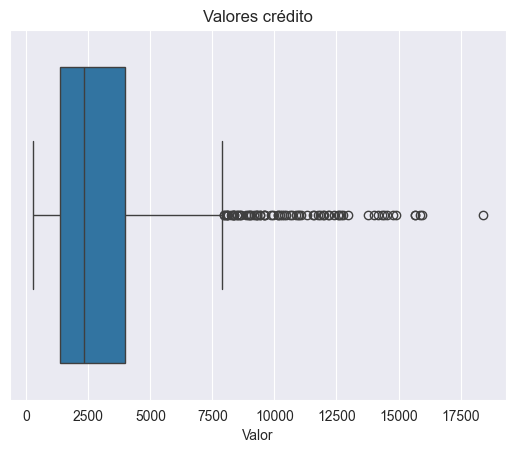

In [34]:
# Boxplot para verificar a existência de outliers 
sns.boxplot(data=credito_copia.Valor, orient='h').set_title('Valores crédito')

In [35]:
# Tratando outiliers
desvio_valores = sts.stdev(credito_copia['Valor'])
# Define outliers sendo 2 vezes maior que o desvio padrão
out_valor = credito_copia.loc[credito_copia['Valor'] >= 2*desvio_valores]
out_valor

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951,1,2,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
2,4,42,2,3,7882,1,3,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
4,6,36,2,2,9055,0,2,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1
12,18,30,4,6,8072,0,0,2,4,3,3.0,25,1,1.0,3,4,1,0,0,1
13,19,24,2,5,12579,1,4,4,1,3,2.0,44,3,2.0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,989,24,2,5,6579,1,1,4,4,3,2.0,29,3,2.0,1,1,1,1,0,1
986,896,36,3,5,8947,0,2,3,4,3,2.0,31,2,1.0,1,1,2,1,0,1
989,396,39,3,2,11760,2,3,2,4,3,3.0,32,3,1.0,1,4,1,1,0,1
990,745,39,1,3,14179,0,3,4,4,3,4.0,30,3,1.0,2,1,1,1,0,1


In [36]:
# Calcula a mediana
mediana_valores = sts.median(credito_copia['Valor'])

# Converte a mediana para o mesmo tipo da coluna
mediana_valores = credito_copia['Valor'].dtype.type(mediana_valores)

# Substitui os outliers pela mediana
credito_copia.loc[credito_copia['Valor'] >= 2 * desvio_valores, 'Valor'] = mediana_valores

Text(0.5, 1.0, 'Valores crédito')

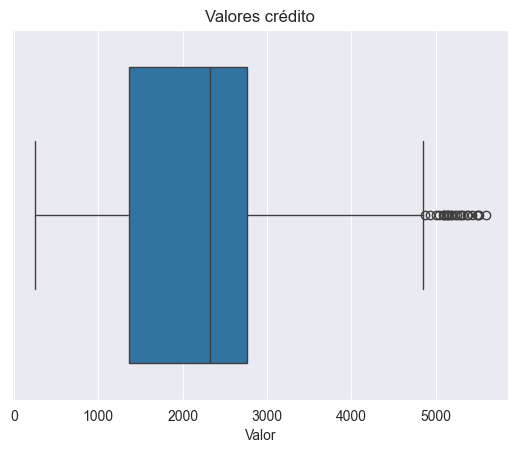

In [37]:
# Verifica mais uma vez a disposição dos valores pelo boxplot
sns.boxplot(data=credito_copia.Valor, orient='h').set_title('Valores crédito')

In [38]:
# A classe Status apresenta uma natureza binária
credito_copia['Status'].unique()

array([0, 1], dtype=int64)

In [39]:
# Contagem de respostas para cada tipo de status
contagem_status = credito_copia.groupby(['Status']).size()

Text(0.5, 1.0, 'Contagem Status')

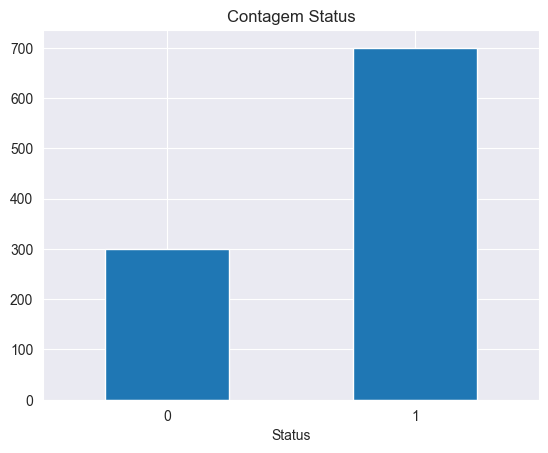

In [40]:
# Criação gráfico de barras para visualizar a contagem
contagem_status.plot.bar(x='Status', y='Quantidade', rot=0).set_title('Contagem Status')

[Text(0.5, 1.0, 'Histograma valores para status adimplente')]

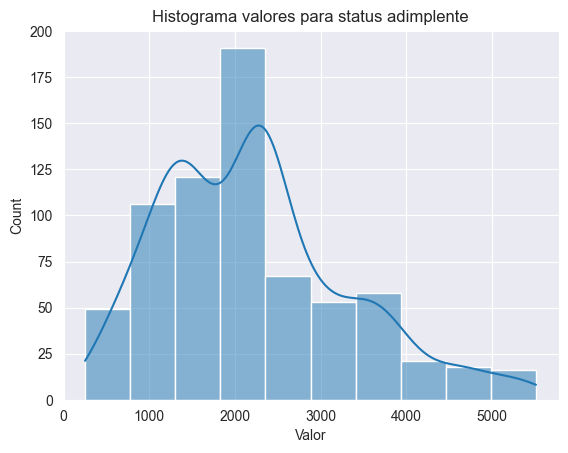

In [41]:
# Histograma para verificar a disposição dos valores para status positivo
sns.histplot(credito_copia[credito_copia['Status'] == 1]['Valor'], kde=True, bins=10).set(title='Histograma valores para status adimplente')

[Text(0.5, 1.0, 'Histograma valores para status inadimplente')]

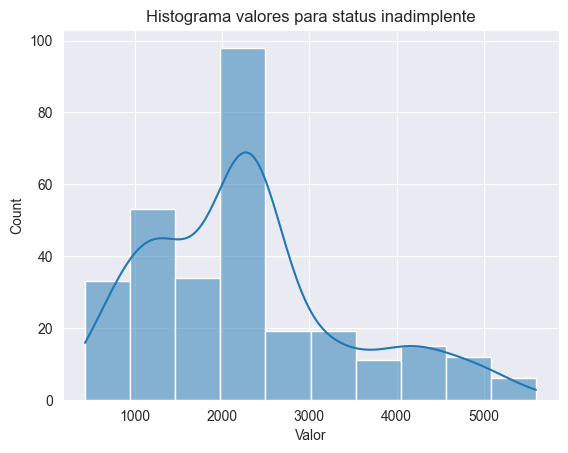

In [42]:
# Histograma para verificar a disposição dos valores para status negativo
sns.histplot(credito_copia[credito_copia['Status'] == 0]['Valor'], kde=True, bins=10).set(title='Histograma valores para status inadimplente')

In [43]:
# Contagem de cada tipo de investimento
agregado_investimento = credito_copia.groupby(['Investimentos']).size()

In [44]:
# Faz um novo mapeamento para buscar os valores originais das instâncias
mapeamento_inverso_inves = {v: k for k, v in encoding_investimento.items()}
agregado_investimento.index = agregado_investimento.index.map(mapeamento_inverso_inves)

In [45]:
# Converter para DataFrame
agregado_investimento = agregado_investimento.reset_index(name='Quantidade')

In [46]:
agregado_investimento

,Investimentos,Quantidade
0,Desconhecido,183
1,<100,603
2,100<=X<500,103
3,500<=X<1000,63
4,>=1000,48


Text(0.5, 1.0, 'Quantidade de investimento')

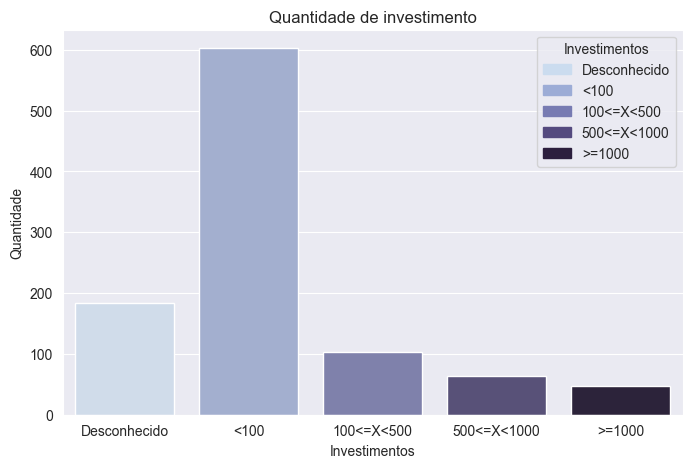

In [47]:
# Criar gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x='Investimentos', y='Quantidade', data=agregado_investimento, hue='Investimentos', palette='ch:s=.25,rot=-.2', legend=False)

# Adicionar legenda manualmente
handles = [plt.Rectangle((0, 0), 1, 1, color=cor) for cor in sns.color_palette('ch:s=.25,rot=-.2', len(agregado_investimento))]
plt.legend(handles, agregado_investimento['Investimentos'], title="Investimentos")
plt.title("Quantidade de investimento")

In [48]:
# Aramazena a contagem de cada tipo de propósito para status positivo
proposito_adi = credito_copia[credito_copia['Status'] == 1]
proposito_adi = proposito_adi.groupby(['Proposito']).size()

In [49]:
# Recupera os valores originais do index
proposito_adi.index = proposito_adi.index.map(proposito_dic)

In [50]:
# Converter para DataFrame
proposito_adi = proposito_adi.reset_index(name='Quantidade')

Text(0.5, 1.0, 'Propositos para status adimplente')

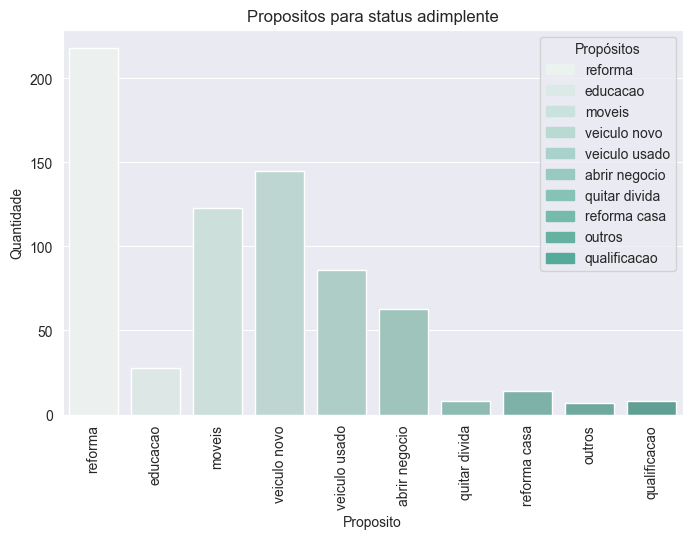

In [51]:
# Criar gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x='Proposito', y='Quantidade', data=proposito_adi, hue='Proposito', palette='light:#5A9', legend=False)
plt.xticks(rotation=90) 

# Adicionar legenda manualmente
handles = [plt.Rectangle((0, 0), 1, 1, color=cor) for cor in sns.color_palette('light:#5A9', len(proposito_adi))]
plt.legend(handles, proposito_adi['Proposito'], title="Propósitos")
plt.title('Propositos para status adimplente')

In [52]:
# O mesmo para o status negativo
proposito_inadi = credito_copia[credito_copia['Status'] == 0]
proposito_inadi = proposito_inadi.groupby(['Proposito']).size()

In [53]:
proposito_inadi.index = proposito_inadi.index.map(proposito_dic)

In [54]:
# Converter para DataFrame
proposito_inadi = proposito_inadi.reset_index(name='Quantidade')

Text(0.5, 1.0, 'Propositos para status inadimplente')

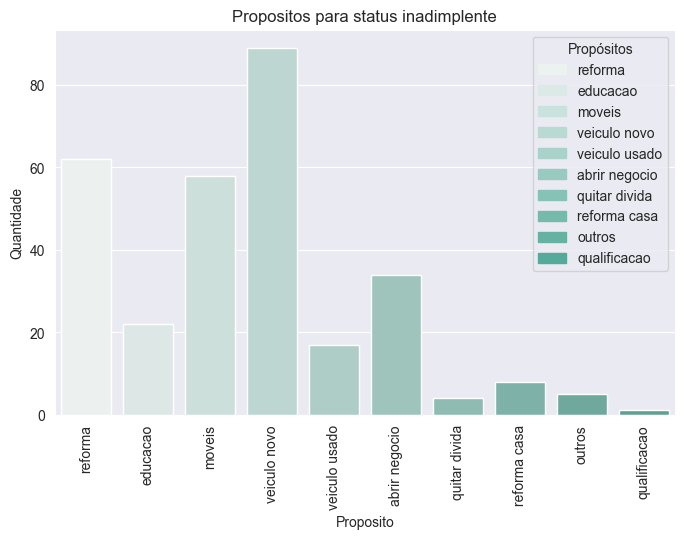

In [55]:
# Criar gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x='Proposito', y='Quantidade', data=proposito_inadi, hue='Proposito', palette='light:#5A9', legend=False)
plt.xticks(rotation=90) 

# Adicionar legenda manualmente
handles = [plt.Rectangle((0, 0), 1, 1, color=cor) for cor in sns.color_palette('light:#5A9', len(proposito_inadi))]
plt.legend(handles, proposito_inadi['Proposito'], title="Propósitos")
plt.title('Propositos para status inadimplente')

In [56]:
# Contagem para cada tipo de status de diferentes atributos: duração do crédito, idade dos clientes e estado civil do cliente
duracao_adi = credito_copia[credito_copia['Status'] == 1].groupby(['Duracao']).size()
duracao_inadi = credito_copia[credito_copia['Status'] == 0].groupby(['Duracao']).size()
idade_adi = credito_copia[credito_copia['Status'] == 1].groupby(['Idade']).size()
idade_inadi = credito_copia[credito_copia['Status'] == 0].groupby(['Idade']).size()
estado_civil_adi = credito_copia[credito_copia['Status'] == 1].groupby(['EstadoCivil']).size()
estado_civil_inadi = credito_copia[credito_copia['Status'] == 0].groupby(['EstadoCivil']).size()

<Axes: title={'center': 'Inadimplentes'}, xlabel='Duracao'>

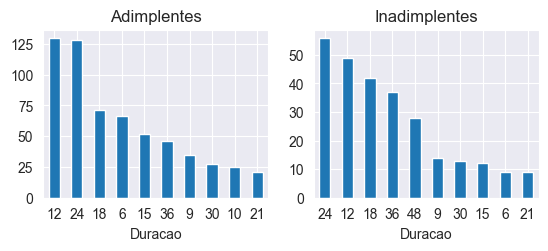

In [57]:
# Plota os dois gráficos de barras para cada tipo de contagem antes feita
plt.figure(1)
plt.subplot(2,2,1)

# Lista as 10 maiores contagens
duracao_adi.nlargest(10).plot.bar(x='Duração', y='Quantidade', rot= 0, title='Adimplentes')
plt.subplot(2,2,2)
duracao_inadi.nlargest(10).plot.bar(x='Duração', y='Quantidade', rot= 0, title='Inadimplentes')

<Axes: title={'center': 'Inadimplentes'}, xlabel='Idade'>

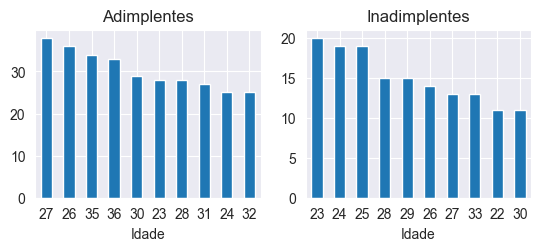

In [58]:
plt.figure(1)
plt.subplot(2,2,1)
# Lista as 10 maiores contagens
idade_adi.nlargest(10).plot.bar(x='Idade', y='Quantidade', rot= 0, title='Adimplentes')
plt.subplot(2,2,2)
idade_inadi.nlargest(10).plot.bar(x='Idade', y='Quantidade', rot= 0, title='Inadimplentes')

In [59]:
# Recupera os valores originais do index
estado_civil_adi.index = estado_civil_adi.index.map(estadocivil_dic)
estado_civil_inadi.index = estado_civil_inadi.index.map(estadocivil_dic)

In [60]:
estado_civil_adi = estado_civil_adi.reset_index(name='Quantidade')
estado_civil_inadi = estado_civil_inadi.reset_index(name='Quantidade')

Text(0.5, 1.0, 'Inadimplentes')

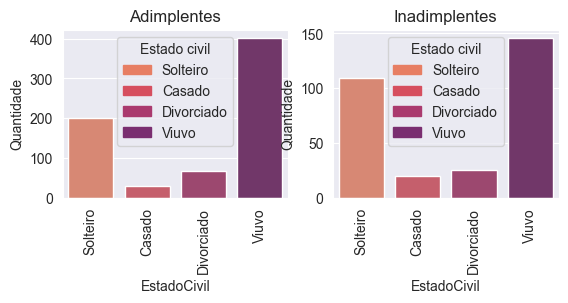

In [61]:
plt.figure(1)
plt.subplot(2,2,1)
sns.barplot(x='EstadoCivil', y='Quantidade', data=estado_civil_adi, hue='EstadoCivil', palette='flare', legend=False)
plt.xticks(rotation=90)

# Adicionar legenda manualmente
handles = [plt.Rectangle((0, 0), 1, 1, color=cor) for cor in sns.color_palette('flare', len(estado_civil_adi))]
plt.legend(handles, estado_civil_adi['EstadoCivil'], title="Estado civil")
plt.title('Adimplentes')

plt.subplot(2,2,2)
sns.barplot(x='EstadoCivil', y='Quantidade', data=estado_civil_inadi, hue='EstadoCivil', palette='flare', legend=False)
plt.xticks(rotation=90)

# Adicionar legenda manualmente
handles = [plt.Rectangle((0, 0), 1, 1, color=cor) for cor in sns.color_palette('flare', len(estado_civil_inadi))]
plt.legend(handles, estado_civil_inadi['EstadoCivil'], title="Estado civil")
plt.title('Inadimplentes')


In [62]:
credito_copia

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,2319,1,2,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,1,3,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,2319,1,3,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,1,2,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,2319,0,2,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,505,24,2,4,1207,1,0,4,1,3,4.0,24,3,3.0,1,999,1,0,0,0
996,834,24,2,1,5084,0,4,2,1,3,4.0,42,3,1.0,1,999,1,1,0,1
997,234,18,2,1,866,1,2,4,3,4,2.0,25,3,1.0,1,3,1,0,0,1
998,474,6,2,10,1238,0,1,4,4,3,4.0,36,3,1.0,1,1,2,1,0,1


In [63]:
# Armazena a contagem dos históricos dos clientes que tiveram crédito aprovado e negado
historico_adi = credito_copia[credito_copia['Status'] == 1].groupby(['HistoricoCredito']).size()
historico_inadi = credito_copia[credito_copia['Status'] == 0].groupby(['HistoricoCredito']).size()

In [64]:
# Recupera os valores originais do index
historico_adi.index = historico_adi.index.map(historico_dic)
historico_inadi.index = historico_inadi.index.map(historico_dic)

In [65]:
historico_adi = historico_adi.reset_index(name='Quantidade')
historico_inadi = historico_inadi.reset_index(name='Quantidade')

In [66]:
historico_adi

,HistoricoCredito,Quantidade
0,Critico-outros creditos,240
1,existentes/pagos,367
2,Atrasos anteriores,58
3,sem creditos/todos pagos,15
4,todos pagos,20


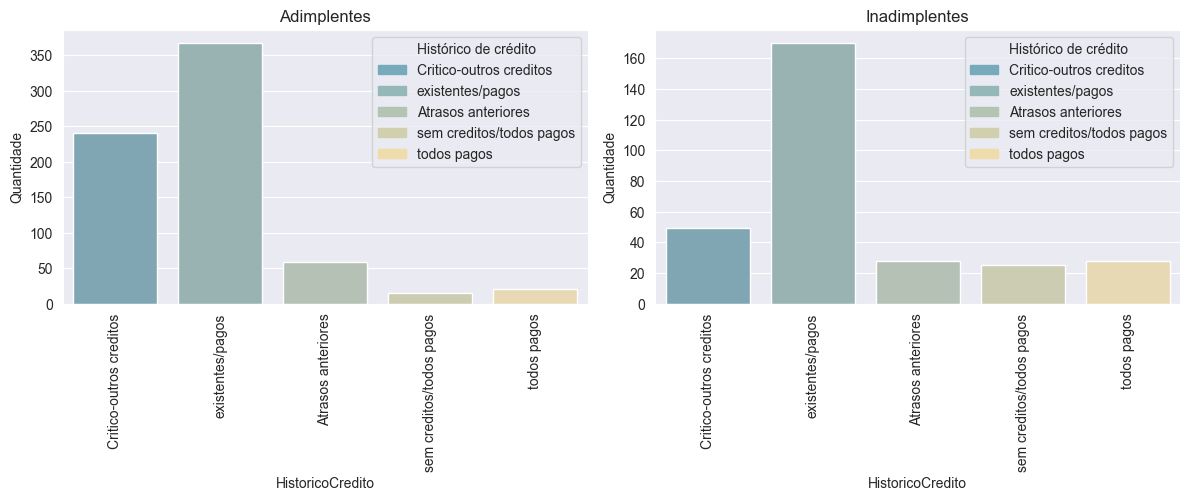

In [67]:
# Aumenta o tamanho da figura
plt.figure(figsize=(12, 8))  # Ajuste o tamanho da figura conforme necessário

# Plota os dois gráficos, o que nos revela a falta de correlação entre os atributos
plt.subplot(2, 2, 1)
sns.barplot(x='HistoricoCredito', y='Quantidade', data=historico_adi, hue='HistoricoCredito', palette='blend:#7AB,#EDA', legend=False)
plt.xticks(rotation=90)

# Adicionar legenda manualmente
handles = [plt.Rectangle((0, 0), 1, 1, color=cor) for cor in sns.color_palette('blend:#7AB,#EDA', len(historico_adi))]
plt.legend(handles, historico_adi['HistoricoCredito'].unique(), title="Histórico de crédito")  # Modifiquei para garantir valores únicos
plt.title('Adimplentes')

plt.subplot(2, 2, 2)
sns.barplot(x='HistoricoCredito', y='Quantidade', data=historico_inadi, hue='HistoricoCredito', palette='blend:#7AB,#EDA', legend=False)
plt.xticks(rotation=90)

# Adicionar legenda manualmente
handles = [plt.Rectangle((0, 0), 1, 1, color=cor) for cor in sns.color_palette('blend:#7AB,#EDA', len(historico_inadi))]
plt.legend(handles, historico_inadi['HistoricoCredito'].unique(), title="Histórico de crédito")  # Modifiquei para garantir valores únicos
plt.title('Inadimplentes')

plt.tight_layout()  # Ajusta o layout para que não haja sobreposição
plt.show()


In [68]:
# Calcula a correlação entre os atributos 
correlacao = credito_copia.corr()

<Axes: >

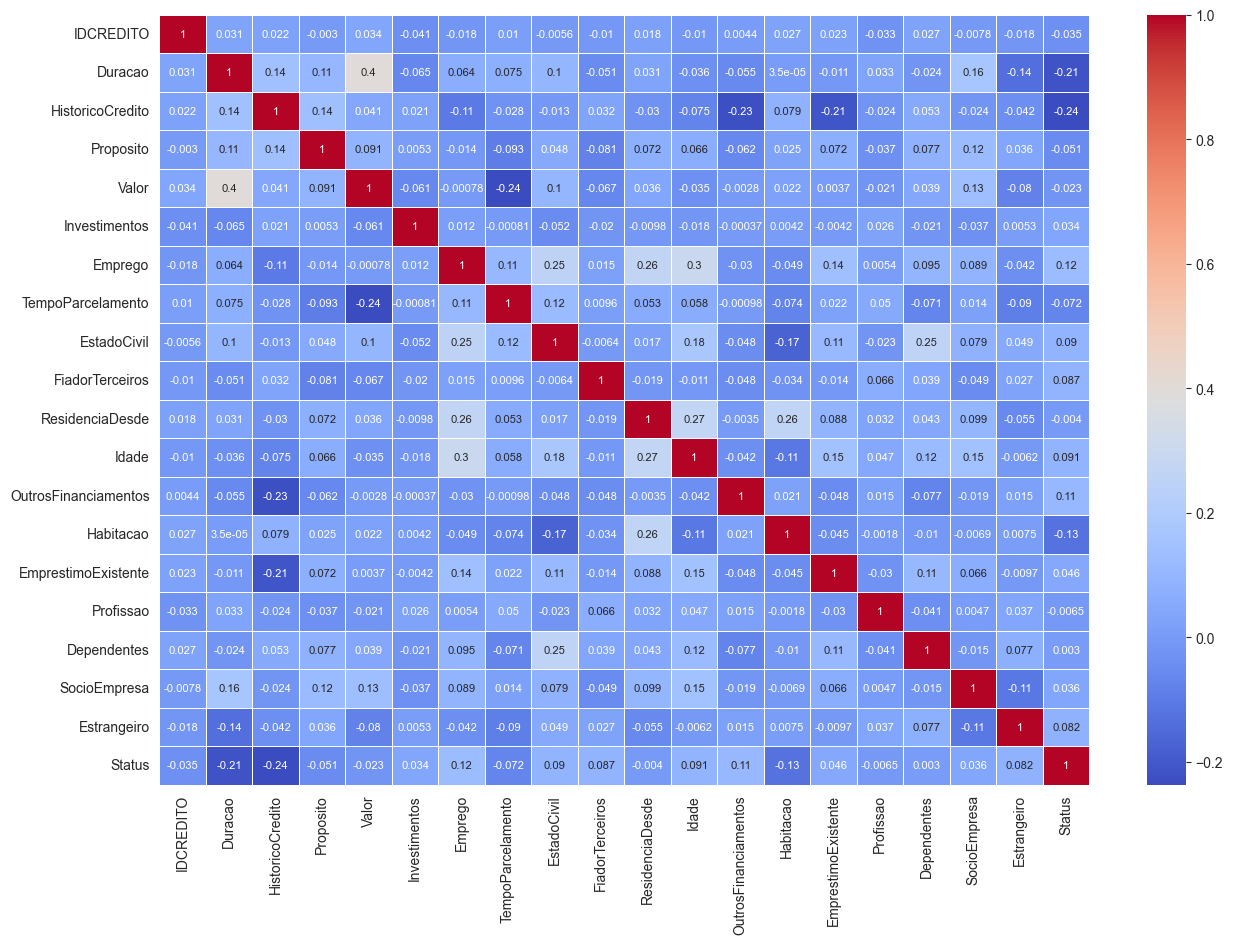

In [69]:
# Criação e plot de um heatmap a partir das correlações feitas
plt.figure(figsize=(15, 10))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", linewidths=0.5, annot_kws={"size": 8})

Treinando o modelo

In [ ]:
# Uma empresa que oferece empréstimo busca buscar reduzir a ocorrência de ininadimplência.
# Sendo assim é necessário criar um sólido modelo de predição

In [70]:
# Import das bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [71]:
credito_copia.shape

(1000, 20)

In [72]:
credito_copia

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,2319,1,2,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,1,3,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,2319,1,3,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,1,2,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,2319,0,2,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,505,24,2,4,1207,1,0,4,1,3,4.0,24,3,3.0,1,999,1,0,0,0
996,834,24,2,1,5084,0,4,2,1,3,4.0,42,3,1.0,1,999,1,1,0,1
997,234,18,2,1,866,1,2,4,3,4,2.0,25,3,1.0,1,3,1,0,0,1
998,474,6,2,10,1238,0,1,4,4,3,4.0,36,3,1.0,1,1,2,1,0,1


In [74]:
# Sepração dos previsores e da classe alvo
previsores = credito_copia.iloc[:,0:19].values
classe = credito_copia['Status']

In [75]:
# Divisão da base de dados entre treinamento e teste (20% para testar e 80% para treinar)
# A divisão (hold out) melhora a avaliação de performance
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, classe, test_size=0.2, random_state=0)

Nauve Bayes

In [76]:
# Criação do modelo 
naive_bayes = GaussianNB()
# Treinamento do modelo
naive_bayes.fit(x_treino, y_treino)

GaussianNB()

In [77]:
# Previsões feitas a partir dos  registros de teste
previsoes = naive_bayes.predict(x_teste)
# Geração da matriz de confusão (verificando a taxa de acerto e erro)
matriz_confussao = confusion_matrix(y_teste, previsoes)
matriz_confussao 

array([[ 26,  28],
       [ 21, 125]], dtype=int64)

In [79]:
# Cálculo da taxa de acerto e erro do modelo treinado
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.755

Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
# Uso do Random Forest: cria um conjunto de modelos (testando diferentes variações desde escolha de atributos até dos próprios parâmetros)
# Criação do modelo, n_estimators número de árvores aleatórias que será gerado
floresta = RandomForestClassifier(n_estimators = 500)
# Treina o modelo
floresta.fit(x_treino, y_treino)

RandomForestClassifier(n_estimators=500)

In [89]:
# Previsões feitas pelos valores separados para teste
previsoes_floresta = floresta.predict(x_teste)
# Gera a matriz de confusão em busca de visualizar a taxa de acerto
matriz_confusao_floresta = confusion_matrix(y_teste, previsoes_floresta)
matriz_confusao_floresta

array([[ 19,  35],
       [  8, 138]], dtype=int64)

In [90]:
# Calcula a taxa de acerto 
taxa_acerto_floresta = accuracy_score(y_teste, previsoes_floresta)
taxa_acerto_floresta

0.785

Seleção de atributos

In [91]:
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
# Pela presença de muitos atributos, torna-se seleção de atributos
# Criação de modelo. SVC: Suport Vector Machine (máquina de vetor de suporte)
svm = SVC()
# Treina o modelo
svm.fit(x_treino, y_treino)

SVC()

In [92]:
# Previsão a partir dos dados separados para teste
previsao_svm = svm.predict(x_teste)
previsao_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [93]:
# Cálculo da taxa de acerto utilizando accuracy_score. 
# Passa como parâmetro os dados antes armazenados como teste (os valores que de fato aconteceram) e as previsões
svm_taxa_acerto = accuracy_score(y_teste, previsao_svm)
svm_taxa_acerto

0.73

In [94]:
# Criação da matriz de confusão, rápida visualização da taxa de acerto
matriz_confusao_svm = confusion_matrix(y_teste, previsao_svm)
matriz_confusao_svm

array([[  0,  54],
       [  0, 146]], dtype=int64)

In [95]:
# Utilização do algoritmo ExtraTreesClassifier para extrair as características mais importantes
forest_classifier = ExtraTreesClassifier()
forest_classifier.fit(x_treino, y_treino)

ExtraTreesClassifier()

In [96]:
# Armazena e imprime as importâncias de cada atributo
importancias_forest = forest_classifier.feature_importances_
importancias_forest

array([0.07701037, 0.09504449, 0.07617127, 0.06489553, 0.07743709,
       0.05455884, 0.06344154, 0.05642407, 0.04294773, 0.02648813,
       0.05498302, 0.0840648 , 0.03530856, 0.0392237 , 0.03590141,
       0.04758158, 0.02496712, 0.034572  , 0.00897877])

In [99]:
# Os valores encontrados em sua maioria são baixos (não podendo ter uma clara distinção dos melhores atributos para treinar o modelo)
# Percorre toda a lista e imprime quais posições possuem valores maiores que 0.04
pos = 0
for i in importancias_forest:
    if i > 0.06:
        print(pos)
    pos = pos + 1

0
1
2
3
4
6
11


In [100]:
# Armazena como novos valores de treino e teste as posições encontradas de atributos de maior valor
x_treino_2 = x_treino[:, [0, 1, 2, 3, 4, 6, 11]]
x_teste_2 = x_teste[:, [0, 1, 2, 3, 4, 6, 11]]

In [101]:
# Criar de outro modelo com a base de dados reduzida
svm2 = SVC()
# Novo treinamento
svm2.fit(x_treino_2, y_treino)
# Novas previsões
previsoes_svm_2 = svm2.predict(x_teste_2)
# Cálculo da taxa de acerto
svm_2_taxa_acerto = accuracy_score(y_teste, previsoes_svm_2)
svm_2_taxa_acerto

0.73

Aprendizado baseado em instâncias

In [102]:
from sklearn.neighbors import KNeighborsClassifier
# Criação do modelo, n define a quantidade de vizinhos como parâmetro
knn = KNeighborsClassifier(n_neighbors = 3)
# Treina o modelo
knn.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=3)

In [103]:
# Geração das previsões
previsoes = knn.predict(x_teste)
previsoes

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1], dtype=int64)

In [104]:
# Criação da matriz de confusão 
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 16,  38],
       [ 36, 110]], dtype=int64)

In [105]:
#taxas de acerto e erro
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.63

Rede Neural

In [131]:
# Importando bibliotecas necessárias 
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np

# Criação da estrutura da rede neural com a classe Sequential (sequência de camadas)
modelo = Sequential()
# Primeira camada oculta, 16 neuronios, 19 neuronios de entrada
modelo.add(Dense(units=32, input_dim=19, activation='relu'))
# Uso do dropout para evitar overfitting - 20% das transmissões serão zeradas
modelo.add(Dropout(0.2))
# Segunda camada oculta
modelo.add(Dense(units = 8))
# Função softmax
# (é gerada uma probabilidade em cada neurônio)
modelo.add(Dense(units = 1, activation = 'sigmoid'))

C:\Users\User\Documents\DataScience\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [132]:
modelo.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 32)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 913 (3.57 KB)

 Trainable params: 913 (3.57 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
# Compilação da rede
# Otimizador: adam
# Função de perda: categorical_crossentropy
# Métrica: accuracy
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Armazena o modelo treinado. Quantidade de epochs 500. Para dados de validação é utilizados os que foram separados para teste
historico = modelo.fit(x_treino, y_treino, epochs = 500,
                       validation_data = (x_teste, y_teste))

Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4781 - loss: 172.5137 - val_accuracy: 0.7300 - val_loss: 45.7266
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5943 - loss: 101.5365 - val_accuracy: 0.7300 - val_loss: 22.7075
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5662 - loss: 97.3585 - val_accuracy: 0.7300 - val_loss: 20.7950
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5651 - loss: 76.3241 - val_accuracy: 0.7300 - val_loss: 17.3745
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5188 - loss: 65.1937 - val_accuracy: 0.7300 - val_loss: 26.3807
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5768 - loss: 62.2219 - val_accuracy: 0.7300 - val_loss: 14.8272
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5723 - loss: 50.7577 - val_accuracy: 0.7300 - val_loss: 14.8049
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5747 - loss: 46.1226 - val_acc

In [134]:
# Pega os valores do histórico
historico_treino = historico.history['accuracy']
historico_validacao = historico.history['val_accuracy']

# Encontra a maior acurácia e a época correspondente
melhor_acuracia = max(historico_treino)
melhor_epoca = historico_treino.index(melhor_acuracia) + 1  # +1 porque índices começam do zero

melhor_acuracia_val = max(historico_validacao)
melhor_epoca_val = historico_validacao.index(melhor_acuracia_val) + 1

print(f"Melhor acurácia de treino: {melhor_acuracia:.4f} na época {melhor_epoca}")
print(f"Melhor acurácia de validação: {melhor_acuracia_val:.4f} na época {melhor_epoca_val}")


Melhor acurácia de treino: 0.7387 na época 477
Melhor acurácia de validação: 0.7350 na época 417


Text(0.5, 1.0, 'Evolução do Erro e Precisão do Modelo')

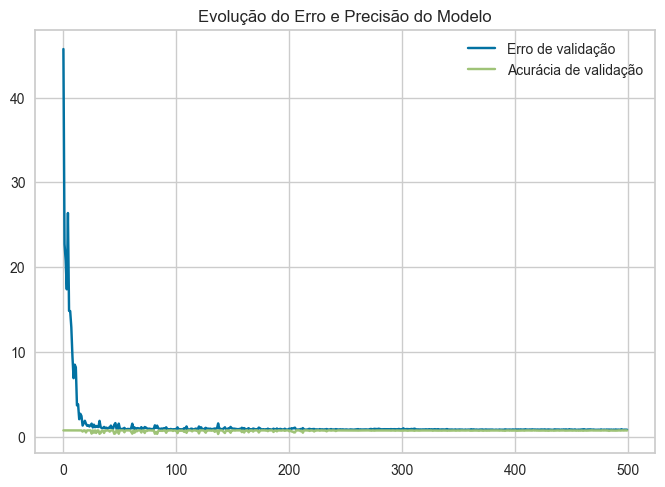

In [135]:
# Gráfico para visualizar os erros e a precisão
historico.history.keys()
plt.plot(historico.history['val_loss'])
plt.plot(historico.history['val_accuracy'])
plt.legend(["Erro de validação", "Acurácia de validação"])
plt.title("Evolução do Erro e Precisão do Modelo")

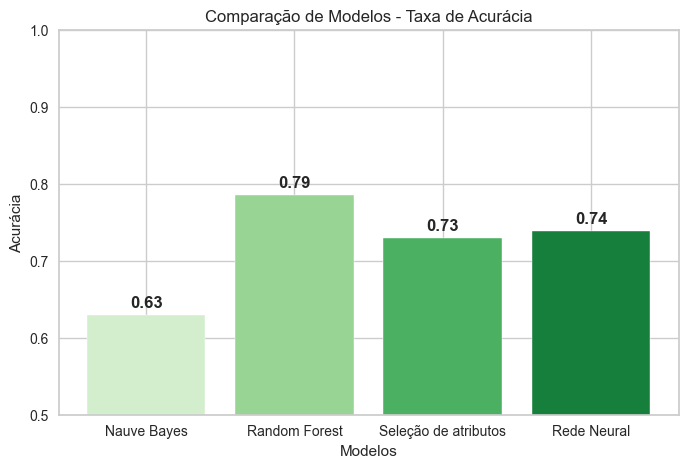

In [137]:
import matplotlib.pyplot as plt

# Resultados de diferentes modelos (substitua pelos valores reais)
resultados = {
    "Nauve Bayes": taxa_acerto,
    "Random Forest": taxa_acerto_floresta,
    "Seleção de atributos": svm_2_taxa_acerto,
    "Rede Neural": melhor_acuracia
}

# Criar o gráfico de barras com tons de verde
plt.figure(figsize=(8, 5))
cores_verde = sns.color_palette("Greens", len(resultados))  # Tons de verde
plt.bar(resultados.keys(), resultados.values(), color=cores_verde)

# Adicionar rótulos e título
plt.xlabel("Modelos")
plt.ylabel("Acurácia")
plt.title("Comparação de Modelos - Taxa de Acurácia")

# Exibir os valores no topo das barras
for i, valor in enumerate(resultados.values()):
    plt.text(i, valor + 0.01, f"{valor:.2f}", ha='center', fontsize=12, fontweight='bold')

# Mostrar o gráfico
plt.ylim(0.5, 1)  # Ajuste o limite do eixo Y conforme necessário
plt.show()